In [ ]:
#@title Installs
!pip install pydot --quiet
!pip install gensim --quiet
!pip install tensorflow==2.15.0 --quiet #15 13
!pip install tf_keras==2.15.0 --quiet
!pip install tensorflow-datasets==4.8 --quiet #8
!pip install tensorflow-text==2.15.0 --quiet #15
!pip install transformers==4.17 --quiet #4.40.2 #4.37.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorstore 0.1.63 requires ml-dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.15.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 35.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tqdm import tqdm
from multiprocessing import Pool, cpu_count
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# getting the data from google drive - you'll need to change this
folder_path = '/content/drive/My Drive/w266/266 Final Project/Music4all Dataset'

# getting the list of dataset in the folder
files = os.listdir(folder_path)
print(files)

['id_genres.csv', 'listening_history.csv', 'id_tags.csv', 'id_lang.csv', 'id_information.csv', 'kaggle_song_lyrics.csv', 'readme.txt', 'id_metadata.csv', 'music4all.zip', 'unzip', '.ipynb_checkpoints', 'songs_info_df.csv', 'songs_info_df.pkl', 'one_genre_df.csv', 'one_genre_df.pkl', 'train_lyrics_df.csv', 'train_lyrics_df.pkl', 'train_df.csv', 'train_df.pkl', 'validation_lyrics_df.csv', 'validation_lyrics_df.pkl', 'validation_df.csv', 'validation_df.pkl', 'test_lyrics_df.csv', 'test_lyrics_df.pkl', 'test_df.csv', 'test_df.pkl', 'X_val_bert.npy', 'X_test_bert.npy', 'X_train_bert_0.npy', 'X_train_bert_1.npy', 'X_train_bert_2.npy', 'X_train_bert_3.npy', 'X_train_bert_4.npy', 'X_train_bert.npy', 'expand_genre_train_df.csv', 'expand_genre_train_df.pkl', 'expand_genre_validation_df.csv', 'expand_genre_validation_df.pkl', 'expand_genre_test_df.csv', 'expand_genre_test_df.csv.pkl', 'tcc_ceds_music.csv', 'cleaned_df.csv', 'cleaned_df.pkl', 'cleaned_df_2.csv', 'cleaned_df_2.pkl']


In [ ]:
tcc_data = pd.read_csv(os.path.join(folder_path, 'tcc_ceds_music.csv'))
expand_genre_train = pd.read_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/expand_genre_train_df.pkl')

In [ ]:
tcc_data.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [ ]:
expand_genre_train.head()

,id,genres,tags,lang,artist,song,album_name,spotify_id,popularity,release,...,key,mode,valence,tempo,duration_ms,mapped_genres,lyrics_id,lyrics,updated_genre,broad_genre
2945,vaTUDcCwxbKUj72o,[pop],"[sampling, the cranberries, zombie, pop]",en,Eminem,In Your Head,Revival,5qykEZTHAcplCLrynoLRnN,60.0,2017,...,1.0,1.0,0.252,82.918,182640,Pop,vaTUDcCwxbKUj72o,"What's in your head, in your head\nZombie, zom...",pop,Pop
29804,0rYt4Pks3wZM7axD,[rap],"[shawnna, hip-hop, rap, female rap]",en,Shawnna,Gettin' Some,Block Music,4uNisev7PGUAixBOagpgyY,39.0,2006,...,4.0,0.0,0.648,78.059,202760,Hip Hop & Rap,0rYt4Pks3wZM7axD,"Gettin', gettin', gettin'\n\nI was gettin' som...",rap,Hip Hop & Rap
36641,K3XPiN69md8ss0N5,"[rap, west coast rap]","[hip-hop, rap, gangsta rap, 2pac, west coast rap]",en,2Pac,Ambitionz az a Ridah,All Eyez On Me,3ssX20QT5c3nA9wk78V1LQ,74.0,1996,...,2.0,1.0,0.805,87.279,278387,Hip Hop & Rap,K3XPiN69md8ss0N5,"I won't deny it, I'm a straight ridah\nYou don...",rap,Hip Hop & Rap
50376,HDdHAn6CFbKOsme4,[rock],"[rock, alternative, american, fav, 2017, tess]",en,The War on Drugs,Pain,A Deeper Understanding,59P1nrdEImkAKa1nyW9X2e,57.0,2017,...,7.0,0.0,0.482,115.975,330760,Rock,HDdHAn6CFbKOsme4,Go to bed now I can tell\nPain is on the way o...,rock,Rock
20136,FhG1z1oOGeize5ny,"[pop, eurodance]","[pop, 90s, dance, eurodance]",en,Ace of Base,Happy Nation,The Sign (US Album) [Remastered],7fb22pjF62S9r1s1pian5K,46.0,1993,...,1.0,1.0,0.670,96.049,255413,Pop,FhG1z1oOGeize5ny,Laudate omnes gentes laudate\nMagnificat en se...,pop,Pop


In [ ]:
Counter(tcc_data['genre'])

Counter({'pop': 7042,
         'country': 5445,
         'blues': 4604,
         'jazz': 3845,
         'reggae': 2498,
         'rock': 4034,
         'hip hop': 904})

In [ ]:
Counter(expand_genre_train['broad_genre'])

Counter({'Pop': 7744,
         'Hip Hop & Rap': 1982,
         'Rock': 10510,
         'Punk': 3918,
         'Alternative': 1454,
         'Electronic': 4079,
         'Metal': 3998,
         'Folk': 3223,
         'Rhythm & Blues': 1892,
         'Jazz': 589,
         'Country': 856,
         'Latin': 34,
         'Reggae': 95,
         'Classical': 10})

<Axes: >

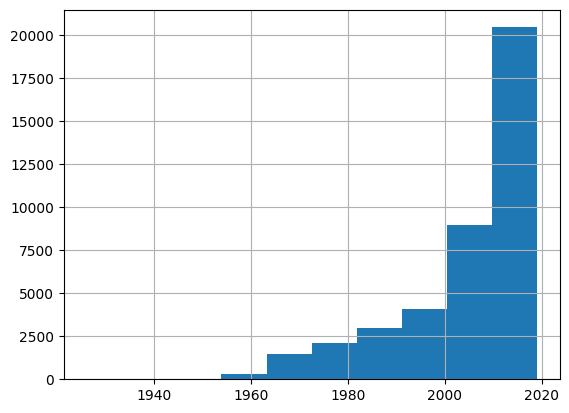

In [ ]:
expand_genre_train['release'].hist()

array([[<Axes: title={'center': 'blues'}>,
        <Axes: title={'center': 'country'}>,
        <Axes: title={'center': 'hip hop'}>],
       [<Axes: title={'center': 'jazz'}>,
        <Axes: title={'center': 'pop'}>,
        <Axes: title={'center': 'reggae'}>],
       [<Axes: title={'center': 'rock'}>, <Axes: >, <Axes: >]],
      dtype=object)

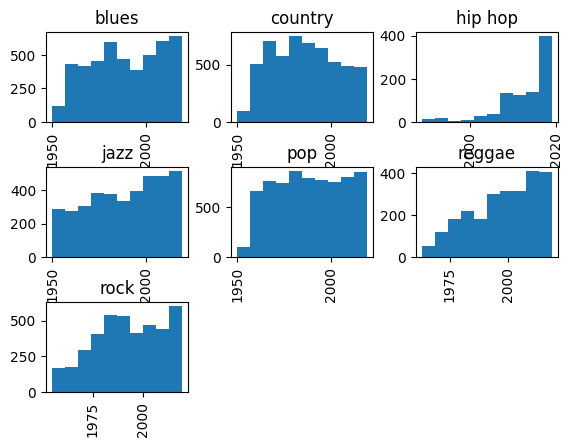

In [ ]:
tcc_data['release_date'].hist(by=tcc_data['genre'])

In [ ]:
expand_genre_train['track_name'] = expand_genre_train['song'].str.lower()
expand_genre_train['artist_name'] = expand_genre_train['artist'].str.lower()

In [ ]:
dup_songs = pd.merge(expand_genre_train, tcc_data, on=['track_name', 'artist_name'], how='inner')

In [ ]:
dup_songs

,id,genres,tags,lang,artist,song,album_name,spotify_id,popularity,release,...,sadness,feelings,danceability_y,loudness,acousticness,instrumentalness,valence_y,energy_y,topic,age
0,0rYt4Pks3wZM7axD,[rap],"[shawnna, hip-hop, rap, female rap]",en,Shawnna,Gettin' Some,Block Music,4uNisev7PGUAixBOagpgyY,39.0,2006,...,0.000877,0.000877,0.826709,0.759249,0.090461,0.000000,0.605317,0.586574,obscene,0.028571
1,FhG1z1oOGeize5ny,"[pop, eurodance]","[pop, 90s, dance, eurodance]",en,Ace of Base,Happy Nation,The Sign (US Album) [Remastered],7fb22pjF62S9r1s1pian5K,46.0,1993,...,0.000993,0.126180,0.658832,0.782530,0.001234,0.004777,0.666117,0.867864,world/life,0.385714
2,gGg0q77rnpLXmP2R,"[lo-fi, indie rock]","[lo-fi, beach rock, summer, indie, bicycling t...",en,Best Coast,When I'm With You,Crazy For You,7Cb9fYGYtFaANCaqYEOCDC,48.0,2010,...,0.002392,0.002392,0.200693,0.797041,0.491967,0.845142,0.289984,0.836832,violence,0.142857
3,X9HHJf2ODVi9SDis,"[rock, alternative rock]","[rock, 80s, alternative, alternative rock, rem]",en,R.E.M.,Sitting Still,Murmur,2PwXk4HTk63MaP8oaAUt7F,30.0,1983,...,0.000993,0.000993,0.434637,0.764864,0.001515,0.000157,0.934048,0.915913,music,0.528571
4,5etHrI3FQbZKWPBh,"[lounge, electronic]","[chillout, lounge, electronic, groove]",en,Groove Armada,Hands Of Time,Lovebox,0eFRusokOSibQkJS6hE9pl,49.0,2003,...,0.345499,0.001316,0.747644,0.713766,0.451807,0.733806,0.386851,0.466450,sadness,0.242857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,hfgqzoNDMEutAJgB,[blues],[blues],en,Sonny Boy Williamson II,Bring It on Home,The Real Folk Blues,1aHR9fHIvmcNQ9oOVqQExT,38.0,1965,...,0.031852,0.001224,0.828875,0.619081,0.618474,0.005395,0.579555,0.396378,music,0.785714
3408,NxIx2Zg3cSCk4AwH,"[soul, rhythm and blues]","[soul, oldies, 50s, rhythm and blues]",en,Sam Cooke,You Send Me,30 Greatest Hits: Portrait of a Legend 1951-1964,0BFEyqJ9DJXS7gKg0Kj46R,60.0,1960,...,0.003096,0.003096,0.532113,0.646899,0.881526,0.000000,0.395095,0.291269,romantic,0.857143
3409,jFko8CM2jEtdb8qn,"[folk, singer-songwriter]","[folk, acoustic, indie, mellow, singer-songwri...",en,Peter Bradley Adams,The Longer I Run,Leavetaking,3rWHqGRVWPDw7SaNadmqGd,47.0,2008,...,0.306447,0.000627,0.589516,0.636233,0.710843,0.236842,0.536274,0.531517,sadness,0.171429
3410,dvwkD1w1L1x5bN8U,"[psychedelic rock, indie rock, rock]","[psychedelic rock, psychedelic, indie rock, rock]",en,Tame Impala,It Is Not Meant to Be,InnerSpeaker,67PE7PvEYWXd2Ct6TBB2Ax,48.0,2010,...,0.037876,0.001504,0.380483,0.793862,0.013955,0.001103,0.375515,0.904902,violence,0.142857


In [ ]:

Counter(dup_songs['genre'])

Counter({'hip hop': 24,
         'pop': 1505,
         'jazz': 200,
         'rock': 1145,
         'blues': 341,
         'country': 188,
         'reggae': 9})

In [ ]:
Counter(dup_songs['broad_genre'])

Counter({'Hip Hop & Rap': 130,
         'Pop': 491,
         'Alternative': 74,
         'Rock': 1353,
         'Jazz': 122,
         'Electronic': 202,
         'Punk': 226,
         'Metal': 259,
         'Rhythm & Blues': 193,
         'Country': 161,
         'Latin': 1,
         'Folk': 191,
         'Reggae': 9})

In [ ]:
len(tcc_data)

28372

In [ ]:
len(expand_genre_train)

40384

In [ ]:
set(tcc_data.columns) & set(expand_genre_train.columns)

{'artist_name', 'danceability', 'energy', 'lyrics', 'track_name', 'valence'}

<Axes: >

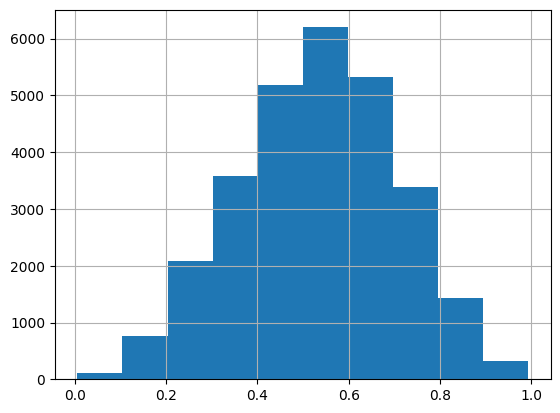

In [ ]:
tcc_data['danceability'].hist()

<Axes: >

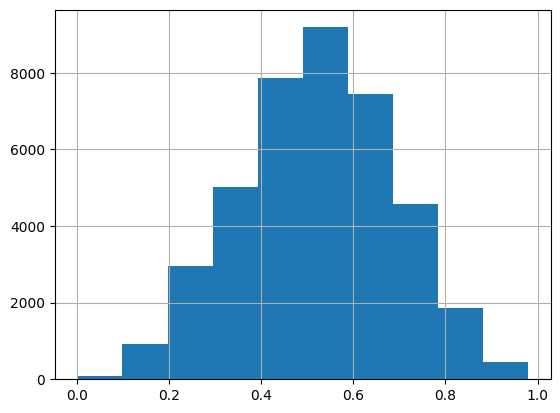

In [ ]:
expand_genre_train['danceability'].hist()

<Axes: >

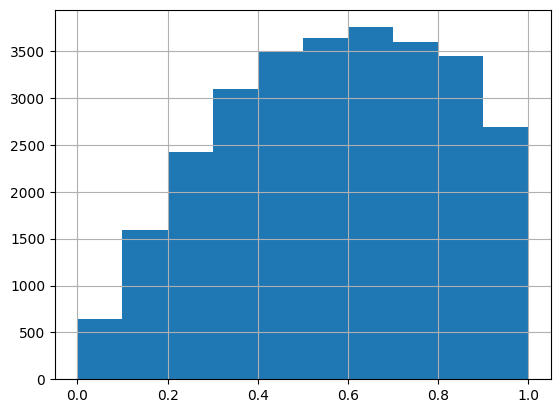

In [ ]:
tcc_data['energy'].hist()

<Axes: >

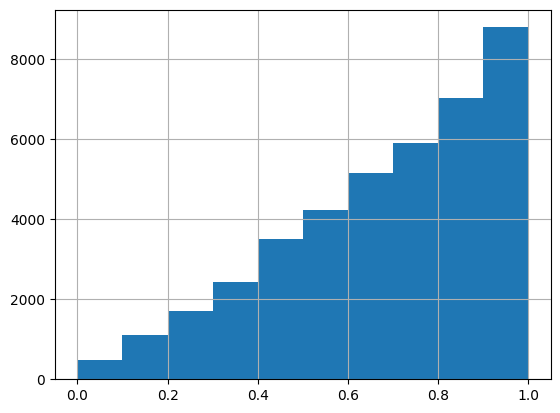

In [ ]:
expand_genre_train['energy'].hist()

<Axes: >

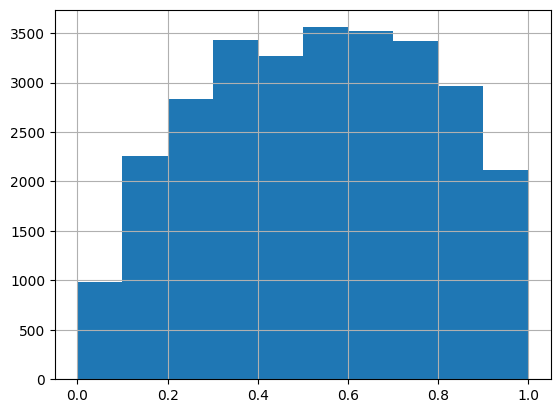

In [ ]:
tcc_data['valence'].hist()

<Axes: >

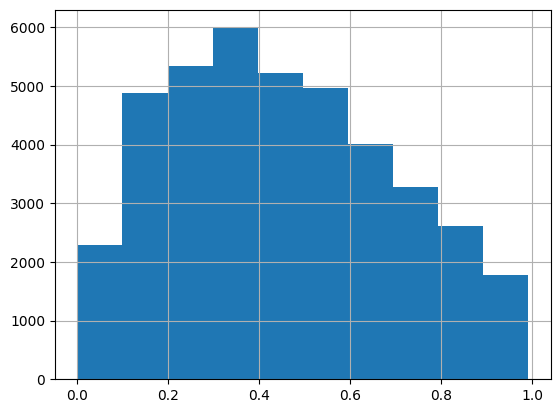

In [ ]:
expand_genre_train['valence'].hist()

In [ ]:
tcc_data.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [ ]:
expand_genre_train.columns

Index(['id', 'genres', 'tags', 'lang', 'artist', 'song', 'album_name',
       'spotify_id', 'popularity', 'release', 'danceability', 'energy', 'key',
       'mode', 'valence', 'tempo', 'duration_ms', 'mapped_genres', 'lyrics_id',
       'lyrics', 'updated_genre', 'broad_genre', 'track_name', 'artist_name'],
      dtype='object')

In [ ]:
tcc_data['broad_genre'] = tcc_data['genre']
tcc_data['release'] = tcc_data['release_date']

In [ ]:
# Concatenate the dataframes
joined_df = pd.concat([expand_genre_train, tcc_data], ignore_index=True).sort_values('id')

# Drop duplicates based on 'artist' and 'title', keeping the first occurrence
# If you prefer to keep entries from df1 when there are duplicates, sort by a column that distinguishes df1 entries
# For example, you could add an indicator column to each dataframe before concatenation
joined_df = joined_df.drop_duplicates(subset=['artist_name', 'track_name'], keep='first')

In [ ]:
joined_df.head()

,id,genres,tags,lang,artist,song,album_name,spotify_id,popularity,release,...,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,loudness,acousticness,instrumentalness,topic,age
24842,0009fFIM1eYThaPg,[pop],"[pop, british, female vocalists, dance, cheryl...",en,Cheryl,Rain on Me,3 Words,3eObKIfHKJ1nAPh0wTxFCc,12.0,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16288,002Jyd0vN4HyCpqL,"[hard rock, rock, classic rock]","[hard rock, rock, classic rock, american artist]",en,Blue Öyster Cult,ME 262,Secret Treaties,273lBFpxUCwisTpdnF9cVb,31.0,1974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9251,007LIJOPQ4Sb98qV,"[post-punk, new wave]","[post-punk, new wave, 1985]",en,The Chameleons,Nostalgia,What Does Anything Mean? Basically (2009 Remas...,6rVxJ3sN3Cz40MSLavbG1K,19.0,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32202,00LuPWdOccBb09bW,"[rock, hard rock, alternative rock, rock, alte...","[rock, hard rock, alternative rock, nickelback...",en,Nickelback,Burn It To The Ground,Dark Horse,1jq28NGw6wdtFKx8MBPy6C,66.0,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13271,00P2bHdWFkghmDqz,[soul],"[fip, soul]",en,Michael Kiwanuka,Tell Me a Tale,Home Again,3ZRvYw3UuvHemty0UHKRSI,35.0,2012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null_counts = joined_df.isnull().sum()

# Print the columns and their null value counts
for column, null_count in null_counts.items():
    print(f"{column}: {null_count} null values")

id: 24960 null values
genres: 24960 null values
tags: 24960 null values
lang: 24960 null values
artist: 24960 null values
song: 24960 null values
album_name: 24960 null values
spotify_id: 24960 null values
popularity: 24960 null values
release: 0 null values
danceability: 0 null values
energy: 0 null values
key: 24960 null values
mode: 24960 null values
valence: 0 null values
tempo: 24960 null values
duration_ms: 24960 null values
mapped_genres: 24960 null values
lyrics_id: 24960 null values
lyrics: 0 null values
updated_genre: 24960 null values
broad_genre: 0 null values
track_name: 0 null values
artist_name: 0 null values
Unnamed: 0: 40384 null values
release_date: 40384 null values
genre: 40384 null values
len: 40384 null values
dating: 40384 null values
violence: 40384 null values
world/life: 40384 null values
night/time: 40384 null values
shake the audience: 40384 null values
family/gospel: 40384 null values
romantic: 40384 null values
communication: 40384 null values
obscene: 403

In [ ]:
cleaned_df = joined_df.dropna(axis=1)

In [ ]:
cleaned_df.head()

,release,danceability,energy,valence,lyrics,broad_genre,track_name,artist_name
24842,2009,0.635,0.746,0.548,"It's a sunny day, so I got nowhere to hide\nNo...",Pop,rain on me,cheryl
16288,1974,0.319,0.925,0.658,Goering's on the phone to Freiburg\nSay's Will...,Rock,me 262,blue öyster cult
9251,2009,0.357,0.708,0.470,Absorbing your words\nBattles raging within me...,Punk,nostalgia,the chameleons
32202,2008,0.617,0.922,0.600,"Well, it's midnight, damn right\nWe're wound u...",Rock,burn it to the ground,nickelback
13271,2012,0.232,0.577,0.669,"Tell me a tale that always was,\nSing me a son...",Rhythm & Blues,tell me a tale,michael kiwanuka


In [ ]:
cleaned_df.shape

(65344, 8)

In [ ]:
Counter(cleaned_df.broad_genre)

Counter({'Pop': 7744,
         'Rock': 10510,
         'Punk': 3918,
         'Rhythm & Blues': 1892,
         'Alternative': 1454,
         'Folk': 3223,
         'Electronic': 4079,
         'Metal': 3998,
         'Hip Hop & Rap': 1982,
         'Country': 856,
         'Jazz': 589,
         'Reggae': 95,
         'Latin': 34,
         'Classical': 10,
         'pop': 5537,
         'country': 5257,
         'blues': 4263,
         'jazz': 3645,
         'reggae': 2489,
         'rock': 2889,
         'hip hop': 880})

In [ ]:
genre_mapping = {
    'Pop': 'Pop', 'pop': 'Pop',
    'Rock': 'Rock', 'rock': 'Rock',
    'Punk': 'Punk',
    'Rhythm & Blues': 'Rhythm & Blues', 'blues': 'Rhythm & Blues',
    'Alternative': 'Alternative',
    'Folk': 'Folk',
    'Electronic': 'Electronic',
    'Metal': 'Metal',
    'Hip Hop & Rap': 'Hip Hop & Rap', 'hip hop': 'Hip Hop & Rap',
    'Country': 'Country', 'country': 'Country',
    'Jazz': 'Jazz', 'jazz': 'Jazz',
    'Reggae': 'Reggae', 'reggae': 'Reggae',
    'Latin': 'Latin',
    'Classical': 'Classical'
}

In [ ]:
cleaned_df['broad_genre'] = cleaned_df['broad_genre'].map(genre_mapping)

<ipython-input-39-096ac8a94a7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['broad_genre'] = cleaned_df['broad_genre'].map(genre_mapping)


In [ ]:
Counter(cleaned_df.broad_genre)

Counter({'Pop': 13281,
         'Rock': 13399,
         'Punk': 3918,
         'Rhythm & Blues': 6155,
         'Alternative': 1454,
         'Folk': 3223,
         'Electronic': 4079,
         'Metal': 3998,
         'Hip Hop & Rap': 2862,
         'Country': 6113,
         'Jazz': 4234,
         'Reggae': 2584,
         'Latin': 34,
         'Classical': 10})

In [ ]:
cleaned_df.head()

,release,danceability,energy,valence,lyrics,broad_genre,track_name,artist_name
24842,2009,0.635,0.746,0.548,"It's a sunny day, so I got nowhere to hide\nNo...",Pop,rain on me,cheryl
16288,1974,0.319,0.925,0.658,Goering's on the phone to Freiburg\nSay's Will...,Rock,me 262,blue öyster cult
9251,2009,0.357,0.708,0.470,Absorbing your words\nBattles raging within me...,Punk,nostalgia,the chameleons
32202,2008,0.617,0.922,0.600,"Well, it's midnight, damn right\nWe're wound u...",Rock,burn it to the ground,nickelback
13271,2012,0.232,0.577,0.669,"Tell me a tale that always was,\nSing me a son...",Rhythm & Blues,tell me a tale,michael kiwanuka


In [ ]:
cleaned_df.shape

(65344, 8)

In [ ]:
cleaned_df = cleaned_df[~cleaned_df['broad_genre'].isin(['Latin', 'Classical'])]

In [ ]:
genre_counts = cleaned_df['broad_genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
print(genre_counts)



             genre  count
0             Rock  13399
1              Pop  13281
2   Rhythm & Blues   6155
3          Country   6113
4             Jazz   4234
5       Electronic   4079
6            Metal   3998
7             Punk   3918
8             Folk   3223
9    Hip Hop & Rap   2862
10          Reggae   2584
11     Alternative   1454


In [ ]:
from tabulate import tabulate
print(tabulate(genre_counts, headers='keys', tablefmt='psql'))


+----+----------------+---------+
|    | genre          |   count |
|----+----------------+---------|
|  0 | Rock           |   13399 |
|  1 | Pop            |   13281 |
|  2 | Rhythm & Blues |    6155 |
|  3 | Country        |    6113 |
|  4 | Jazz           |    4234 |
|  5 | Electronic     |    4079 |
|  6 | Metal          |    3998 |
|  7 | Punk           |    3918 |
|  8 | Folk           |    3223 |
|  9 | Hip Hop & Rap  |    2862 |
| 10 | Reggae         |    2584 |
| 11 | Alternative    |    1454 |
+----+----------------+---------+


In [ ]:
cleaned_df.to_csv('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/cleaned_df.csv', index=False)
cleaned_df.to_pickle('/content/drive/MyDrive/w266/266 Final Project/Music4all Dataset/cleaned_df.pkl')